<a href="https://colab.research.google.com/github/FernandoCerriteno/Portafolio-de-analisis/blob/main/Estad%C3%ADstica%20avanzada/Act2_EstadisticaEd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, uniform, skewnorm
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler, StandardScaler

Obtención del dataset

In [ ]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

X = X.drop('Sex',axis=1)

print(abalone.variables)


             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
df = pd.concat([y, X],axis=1)

In [ ]:
X_fit = sm.add_constant(X)

In [ ]:
X_fit

,const,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
model = sm.OLS(y,X_fit)
fitted_model = model.fit()

Calculo de $r^2$ y parametros

In [ ]:
print(fitted_model.params)
print('\nr^2=', fitted_model.rsquared)

const              2.985154
Length            -1.571897
Diameter          13.360916
Height            11.826072
Whole_weight       9.247414
Shucked_weight   -20.213913
Viscera_weight    -9.829675
Shell_weight       8.576242
dtype: float64

r^2= 0.5276299399919839


In [ ]:
influence = fitted_model.get_influence()

H_diag = influence.hat_matrix_diag
print(H_diag)

[0.00089205 0.00076875 0.00072514 ... 0.00160134 0.00103437 0.0033281 ]


([<matplotlib.axis.XTick at 0x7e2cfe1c95a0>,
  ...],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
 

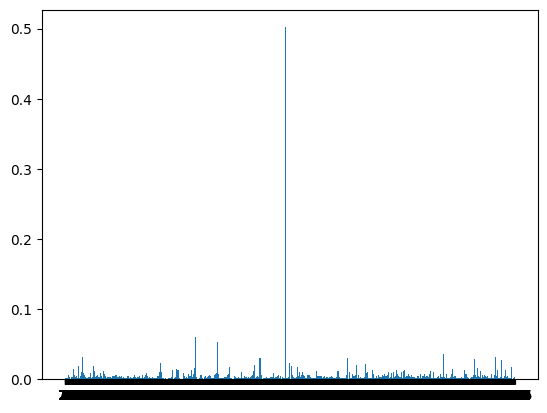

In [ ]:
plt.bar(X.index, H_diag, width=10)
plt.xticks(df.index)

In [ ]:
mapping = sorted(list(enumerate(H_diag)),key = lambda item: item[1], reverse = True)
max_value_idxs = [item[0] for item in mapping]

print('Top distances values')
print([item[1]for item in mapping][:3])

print('\nSample values with more leverage: \n')
print(df.iloc[max_value_idxs])

Top distances values
[0.5019723528421322, 0.05960859244317343, 0.05295671927323318]

Sample values with more leverage: 

      Rings  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051      8   0.455     0.355   1.130        0.5940          0.3320   
1210      6   0.185     0.375   0.120        0.4645          0.1960   
1417     10   0.705     0.565   0.515        2.2100          1.1075   
3518     11   0.710     0.570   0.195        1.3480          0.8985   
163      18   0.725     0.560   0.210        2.1410          0.6500   
...     ...     ...       ...     ...           ...             ...   
837       9   0.475     0.365   0.125        0.5465          0.2290   
600      17   0.535     0.420   0.145        0.9260          0.3980   
3555      8   0.535     0.415   0.135        0.7800          0.3165   
2744     11   0.480     0.375   0.120        0.5895          0.2535   
488      11   0.540     0.420   0.135        0.8075          0.3485   

      Viscera_weight  Shel

<h2>Distancia de Cook

In [ ]:
np.set_printoptions(suppress=True)
cooks_dist=influence.cooks_distance[0]
summary_cooks = influence.summary_frame()

mean_cooks = np.mean(cooks_dist)
mean_cooks_list = [4*mean_cooks for _ in X.index]
cooks_threshold = [4/len(cooks_dist) for _ in X.index]

Puntos influyentes

In [ ]:
influencial_points = X.index[cooks_dist > 4/len(cooks_dist)]
# print(influencial_points)
X.iloc[influencial_points,:].head(10)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320
32,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350
33,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455
36,0.540,0.475,0.155,1.2170,0.5305,0.3075,0.340
67,0.595,0.495,0.185,1.2850,0.4160,0.2240,0.485
72,0.595,0.475,0.170,1.2470,0.4800,0.2250,0.425
81,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.675
83,0.595,0.475,0.160,1.3175,0.4080,0.2340,0.580
85,0.570,0.465,0.180,1.2950,0.3390,0.2225,0.440


$r^2$ con los puntos influyentes

In [ ]:
model_PI = sm.OLS(y.iloc[influencial_points,:],X.iloc[influencial_points,:])
fitted_model_PI = model.fit()

print(fitted_model_PI.params)
print('\nr^2=', fitted_model_PI.rsquared)

const              2.985154
Length            -1.571897
Diameter          13.360916
Height            11.826072
Whole_weight       9.247414
Shucked_weight   -20.213913
Viscera_weight    -9.829675
Shell_weight       8.576242
dtype: float64

r^2= 0.5276299399919839


<h2>Outliers

Identificación de los Outliers

Detección usando Z-score

In [ ]:
up_lim = X.mean() + 3*X.std()
dw_lim = X.mean() - 3*X.std()

In [ ]:
print("Upper limit:\n",up_lim)
print("\nLower limit:\n",dw_lim)

Upper limit:
 Length            0.884271
Diameter          0.705601
Height            0.264998
Whole_weight      2.299909
Shucked_weight    1.025256
Viscera_weight    0.509436
Shell_weight      0.656439
dtype: float64

Lower limit:
 Length            0.163713
Diameter          0.110162
Height            0.014035
Whole_weight     -0.642425
Shucked_weight   -0.306521
Viscera_weight   -0.148249
Shell_weight     -0.178777
dtype: float64


In [ ]:
print("Number of outlier Samples:\n",dw_lim)

Number of outlier Samples:
 Length            0.163713
Diameter          0.110162
Height            0.014035
Whole_weight     -0.642425
Shucked_weight   -0.306521
Viscera_weight   -0.148249
Shell_weight     -0.178777
dtype: float64


Usando percentiles

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
iqr= Q3-Q1

In [ ]:
print("Q1:",Q1)
print("\nQ3:",Q3)
print("\nIQR:",iqr)

Q1: Length            0.4500
Diameter          0.3500
Height            0.1150
Whole_weight      0.4415
Shucked_weight    0.1860
Viscera_weight    0.0935
Shell_weight      0.1300
Name: 0.25, dtype: float64

Q3: Length            0.615
Diameter          0.480
Height            0.165
Whole_weight      1.153
Shucked_weight    0.502
Viscera_weight    0.253
Shell_weight      0.329
Name: 0.75, dtype: float64

IQR: Length            0.1650
Diameter          0.1300
Height            0.0500
Whole_weight      0.7115
Shucked_weight    0.3160
Viscera_weight    0.1595
Shell_weight      0.1990
dtype: float64


In [ ]:
outliers_iqr = (X<Q1 + 1.5 * iqr) | (X>Q3 + 1.5 * iqr)
print("Number of outlier samples",X.to_numpy()[outliers_iqr].shape)

Number of outlier samples (27016,)


Manejo de Valores atípicos

Escalado min-max

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
print("Max Values:", scaler.data_max_)

print("\nTransformation step:")
mima = scaler.transform(X)
print(mima)
print(scaler.transform([[2,2,2,2,2,2,2]]))

Max Values: [0.815  0.65   1.13   2.8255 1.488  0.76   1.005 ]

Transformation step:
[[ 0.02702703  0.04201681 -0.83185841 ... -0.69939475 -0.73535221
  -0.70403587]
 [-0.25675676 -0.29411765 -0.84070796 ... -0.86751849 -0.87360105
  -0.86347783]
 [ 0.22972973  0.22689076 -0.76106195 ... -0.65635508 -0.62870309
  -0.58445441]
 ...
 [ 0.41891892  0.41176471 -0.63716814 ... -0.29455279 -0.24423963
  -0.38913802]
 [ 0.48648649  0.44537815 -0.73451327 ... -0.28715535 -0.31402238
  -0.41305431]
 [ 0.71621622  0.68067227 -0.65486726 ...  0.27034297 -0.00987492
  -0.01644245]]
[[4.2027027  5.53781513 2.53982301 0.41526474 1.68863484 4.26530612
  2.98305929]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Calculo de $r^2$ y parametros

In [ ]:
model = sm.OLS(y,mima)
fitted_model = model.fit()
print(fitted_model.params)
print('\nr^2=', fitted_model.rsquared)

x1     0.786716
x2     5.565116
x3    -6.575113
x4    19.150070
x5   -18.716406
x6    -5.580455
x7     1.790169
dtype: float64

r^2= 0.9518272060221903


Normalización Z-score

In [ ]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [ ]:
print('Means:',scaler.mean_)

Means: [0.5239921  0.40788125 0.1395164  0.82874216 0.35936749 0.18059361
 0.23883086]


In [ ]:
from matplotlib.colors import scale
print('Transformation step:')
zSc=scaler.transform(X)
print(zSc,'\n')
print(scaler.transform([[2,2,2,2,2,2,2]]))

Transformation step:
[[-0.57455813 -0.43214879 -1.06442415 ... -0.60768536 -0.72621157
  -0.63821689]
 [-1.44898585 -1.439929   -1.18397831 ... -1.17090984 -1.20522124
  -1.21298732]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.4634999  -0.35668983
  -0.20713907]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.74855917  0.97541324
   0.49695471]
 [ 0.84118198  0.77718745  0.25067161 ...  0.77334105  0.73362741
   0.41073914]
 [ 1.54905203  1.48263359  1.32665906 ...  2.64099341  1.78744868
   1.84048058]] 

[[12.2920211  16.04505753 44.48571086  2.38871187  7.39235509 16.60025239
  12.65334926]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Calculo de $r^2$ y parametros|

In [ ]:
model = sm.OLS(y,zSc)
fitted_model = model.fit()
print(fitted_model.params)
print('\nr^2=', fitted_model.rsquared)

x1   -0.188751
x2    1.325777
x3    0.494591
x4    4.534288
x5   -4.486203
x6   -1.077344
x7    1.193693
dtype: float64

r^2= 0.05027502511352544


Winsorización

In [ ]:
Q1 = np.quantile(X.to_numpy(),0.25)
Q3 = np.quantile(X.to_numpy(),0.75)

iqr = Q3-Q1

In [ ]:
print("Q1:",Q1)
print("Q1:",Q3)

Q1: 0.16
Q1: 0.505


In [ ]:
from scipy.stats.mstats import winsorize

win = winsorize(X.to_numpy(), limits=[0.32,0.32])
print(win)

[[0.455  0.365  0.189  ... 0.2245 0.189  0.189 ]
 [0.35   0.265  0.189  ... 0.189  0.189  0.189 ]
 [0.455  0.42   0.189  ... 0.2565 0.189  0.21  ]
 ...
 [0.455  0.455  0.205  ... 0.455  0.2875 0.308 ]
 [0.455  0.455  0.189  ... 0.455  0.261  0.296 ]
 [0.455  0.455  0.195  ... 0.455  0.3765 0.455 ]]


Calculo de $r^2$ y parametros

In [ ]:
model = sm.OLS(y,win.data)
fitted_model = model.fit()
print(fitted_model.params)
print('\nr^2=', fitted_model.rsquared)

x1     0.518333
x2    20.942094
x3     0.693211
x4     4.122509
x5   -15.260867
x6   -11.043420
x7    27.230360
dtype: float64

r^2= 0.9487577149885722


<h2>Multicolinealidad en los datos usando VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(cf):
  varIn = df[cf].copy()
  #Calculo de la inflación de la varianza requiere de una constante
  varIn['intercept'] = 1

  #VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = varIn.columns

  #Calculo de VIF por cada caracteristica
  vif_data["VIF"] = [variance_inflation_factor(varIn.values,i)
                    for i in range(len(varIn.columns))]

  vif_data = vif_data[vif_data['feature']!='intercept']

  return vif_data


Uso de la función VIF

In [ ]:
wX = pd.DataFrame(win,columns = list(X.columns.to_numpy()))

In [ ]:
considered_features = list(wX.columns.to_numpy())
nX = wX.copy()

model = sm.OLS(y,sm.add_constant(nX)).fit()

print(compute_vif(considered_features).sort_values('VIF',ascending=False))
print('\n')
print(model.summary())

          feature         VIF
3    Whole_weight  109.592750
1        Diameter   41.845452
0          Length   40.771813
4  Shucked_weight   28.353191
6    Shell_weight   21.258289
5  Viscera_weight   17.346276
2          Height    3.559939


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     514.0
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:08:33   Log-Likelihood:                -9516.8
No. Observations:                4177   AIC:                         1.905e+04
Df Residuals:                    4169   BIC:                         1.910e+04
Df Model:                           7                                         
Covariance Type:            nonrobust          

In [ ]:
considered_features.remove('Whole_weight')
nX = nX.drop(['Whole_weight'],axis=1)

model = sm.OLS(y,sm.add_constant(nX)).fit()

print(compute_vif(considered_features).sort_values('VIF',ascending=False))
print('\n')
print(model.summary())

          feature        VIF
1        Diameter  41.819755
0          Length  40.763955
4  Viscera_weight  10.697780
3  Shucked_weight   8.852112
5    Shell_weight   7.817781
2          Height   3.558443


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     597.3
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:08:53   Log-Likelihood:                -9520.9
No. Observations:                4177   AIC:                         1.906e+04
Df Residuals:                    4170   BIC:                         1.910e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
     

In [ ]:
considered_features.remove('Diameter')
nX = nX.drop(['Diameter'],axis=1)

model = sm.OLS(y,sm.add_constant(nX)).fit()

print(compute_vif(considered_features).sort_values('VIF',ascending=False))
print('\n')
print(model.summary())

          feature        VIF
3  Viscera_weight  10.690504
2  Shucked_weight   8.851834
0          Length   8.013867
4    Shell_weight   7.457755
1          Height   3.509983


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     668.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:09:06   Log-Likelihood:                -9587.5
No. Observations:                4177   AIC:                         1.919e+04
Df Residuals:                    4171   BIC:                         1.923e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std e

In [ ]:
considered_features.remove('Length')
nX = nX.drop(['Length'],axis=1)
model = sm.OLS(y,sm.add_constant(nX)).fit()

print(compute_vif(considered_features).sort_values('VIF',ascending=False))
print('\n')
print(model.summary())

          feature        VIF
2  Viscera_weight  10.334260
1  Shucked_weight   8.106113
3    Shell_weight   6.848921
0          Height   3.197236


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     518.7
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:09:18   Log-Likelihood:                -9973.3
No. Observations:                4177   AIC:                         1.996e+04
Df Residuals:                    4172   BIC:                         1.999e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|     

In [ ]:
considered_features.remove('Viscera_weight')
nX = nX.drop(['Viscera_weight'],axis=1)
model = sm.OLS(y,sm.add_constant(nX)).fit()

print(compute_vif(considered_features).sort_values('VIF',ascending=False))
print('\n')
print(model.summary())

          feature       VIF
2    Shell_weight  5.666451
1  Shucked_weight  4.709420
0          Height  3.135094


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     587.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          1.79e-318
Time:                        00:09:30   Log-Likelihood:                -10081.
No. Observations:                4177   AIC:                         2.017e+04
Df Residuals:                    4173   BIC:                         2.019e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [ ]:
from sklearn.metrics import mean_squared_error

nX = sm.add_constant(nX)
model = sm.OLS(y,nX).fit()

y_pred = model.predict(nX)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.307194346564264
